In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import dataframe_image as dfi
import datetime

%matplotlib inline

In [2]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC','FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME',
         'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI',
         'SC', 'SD', 'TN', 'TX', 'UT','VT', 'VA', 'WA', 'WV', 'WI', 'WY']
states1 = ['AL', 'AK', 'AZ', 'AR', 'CO', 'CT', 'DE', 'DC','FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME',
         'MD', 'MA', 'MI', 'MN', 'MS', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI',
         'SC', 'SD', 'TN', 'TX', 'UT','VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [3]:
states[1]

'AK'

In [4]:
eventlist = []
eventlistscrubbed = []

for state in states1:
    URL = 'https://nuforc.org/webreports/ndxl'+state+'.html'
    response = requests.get(URL)
    soup = bs(response.text)
    events = soup.find_all('tr', attrs = {'valign' : 'TOP'})

    for event in events:
        eventlist.append([entry.text for entry in event.find_all('td', recursive = False)])
    
    eventlistscrubbed.extend(eventlist)

In [5]:
eventlistscrubbed

[['6/19/22 01:20',
  'Cordova',
  'AL',
  'USA',
  'Light',
  '10 min',
  'Bright object with light ring trailing it',
  '6/22/22',
  'Yes'],
 ['6/14/22 20:35',
  'Guntersville',
  'AL',
  'USA',
  'Light',
  'About 70 minutes',
  'A sphere/ball of light hovering above the water.',
  '6/22/22',
  'Yes'],
 ['6/11/22 13:42',
  'Montgomery',
  'AL',
  'USA',
  'Cylinder',
  'Probably 20-25 mins',
  'In a telescope it looked like a purplish pink spec, to the eye was black almost spherical',
  '6/22/22',
  'Yes'],
 ['6/6/22 21:30',
  'TRUSSVILLE',
  'AL',
  'USA',
  'Light',
  '8-10 seconds',
  'Three lights moving across the sky',
  '6/22/22',
  ''],
 ['6/5/22 02:00',
  'Cold Bluff, Alabama',
  'AL',
  'USA',
  'Changing',
  'Unbleiveabla',
  'Terrifying',
  '6/22/22',
  ''],
 ['6/4/22 15:45',
  'Dothan',
  'AL',
  'USA',
  '',
  '',
  'MADAR Node 195',
  '6/22/22',
  ''],
 ['6/4/22 03:38',
  'Cullman',
  'AL',
  'USA',
  'Unknown',
  'Currently Happening',
  'UFO was seemingly \x93bouncin

In [6]:
what = [entry for entry in eventlistscrubbed if len(entry) != 9]

In [7]:
df = pd.DataFrame(eventlistscrubbed)
dftail = df.tail(20)

In [8]:
#dfi.export(dftail, '../data/firsttable.png')

In [9]:
df = df.rename(columns={0 : 'Incident Date', 1 : 'City', 2 : 'State', 3 : 'Country', 4 : 'Type of UFO', 5 : 'Duration', 6 : 'Description', 7 : 'Posted', 8 : 'Picture'})

In [10]:
df

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture
0,6/19/22 01:20,Cordova,AL,USA,Light,10 min,Bright object with light ring trailing it,6/22/22,Yes
1,6/14/22 20:35,Guntersville,AL,USA,Light,About 70 minutes,A sphere/ball of light hovering above the water.,6/22/22,Yes
2,6/11/22 13:42,Montgomery,AL,USA,Cylinder,Probably 20-25 mins,In a telescope it looked like a purplish pink ...,6/22/22,Yes
3,6/6/22 21:30,TRUSSVILLE,AL,USA,Light,8-10 seconds,Three lights moving across the sky,6/22/22,
4,6/5/22 02:00,"Cold Bluff, Alabama",AL,USA,Changing,Unbleiveabla,Terrifying,6/22/22,
...,...,...,...,...,...,...,...,...,...
2553489,7/3/51 12:00,Green River,WY,USA,Sphere,5 to 7 min,Glowing white spherical large craft (50 to 100...,10/15/02,
2553490,6/30/49 23:00,Little America (near),WY,USA,Disk,5 minutes,"One night as a child, I saw a little man in a ...",12/1/19,
2553491,6/30/71 14:00,Yellowstone National Park,WY,USA,Egg,not known,Old photos from 1871 show what appears to be o...,12/12/09,
2553492,20:04,Wright,WY,USA,Changing,2+ hours,Was standing outside. A huge bright green ligh...,12/21/17,


In [11]:
df.value_counts('Type of UFO')

Type of UFO
Light        517419
Circle       272886
Triangle     234343
Fireball     180446
Unknown      172626
Other        171415
Sphere       163491
Disk         145134
             120359
Oval         108915
Formation     84456
Changing      62744
Cigar         62664
Rectangle     44985
Flash         44344
Cylinder      39588
Diamond       34764
Chevron       29447
Teardrop      21520
Egg           20953
Cone           9193
Cross          8411
light          1106
Star            641
triangle        353
Delta           318
other           301
cylinder        124
rectangle       121
sphere           94
circle           65
fireball         49
changing         38
delta            36
unknown          36
flash            28
cigar            27
diamond          22
oval             19
egg              13
dtype: int64

##  check value counts

In [12]:
df[df['State'] == 'TN'].drop_duplicates()

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture
1763670,6/20/22 07:35,Dandridge,TN,USA,Egg,2-3 seconds,silver egg flies through the morning sky + dis...,6/22/22,
1763671,6/18/22 21:39,LaVergne,TN,USA,Fireball,30 sec,Fireball object,6/22/22,
1763672,6/18/22 17:15,Knoxville,TN,USA,Cigar,10-12 minutes,Two Cigar crafts flying in a zigzag.,6/22/22,Yes
1763673,6/10/22 22:40,Goodlettsville,TN,USA,Light,2 minutes,Moderately paced moving deep orange light on c...,6/22/22,
1763674,6/9/22 21:00,White House,TN,USA,Changing,2 hours,Shape/Color changing UFO,6/22/22,Yes
...,...,...,...,...,...,...,...,...,...
1765828,18:00,Brownsville,TN,USA,Fireball,10 minutes,Comet shaped fire ball going in circles above ...,1/3/01,
1765829,13:00,Charlotte,TN,USA,Cylinder,5 minutes,"Long silver obgect, no noise or sound, floating.",5/12/10,
1765830,5 yrs. ago 07:00,Halls,TN,USA,,now,i can get medical records. I been sended to me...,1/31/20,
1765831,09/??/95-98-99 03:00,Oak Ridge,TN,USA,Disk,10 sec.&2hours,Sitting at the park at night seem the disc goi...,4/15/00,


In [13]:
df = df.drop_duplicates()

In [14]:
df.value_counts('State')

State
FL    7680
WA    6812
TX    5728
NY    5528
AZ    4686
PA    4675
OH    4196
IL    4073
MI    3438
NC    3422
OR    3356
CO    3043
NJ    2708
IN    2566
GA    2551
VA    2526
MA    2508
WI    2307
TN    2163
SC    2118
MN    1995
CT    1901
MD    1700
NV    1598
KY    1593
NM    1565
UT    1428
OK    1387
AL    1288
ID    1276
AR    1203
IA    1156
KS    1120
ME    1119
NH    1113
LA    1053
MT     952
WV     854
MS     741
NE     660
HI     646
AK     615
RI     571
VT     568
WY     387
DE     385
SD     368
ND     265
DC     138
Fl       5
dtype: int64

##  Value counts are almost correct!

In [15]:
df

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture
0,6/19/22 01:20,Cordova,AL,USA,Light,10 min,Bright object with light ring trailing it,6/22/22,Yes
1,6/14/22 20:35,Guntersville,AL,USA,Light,About 70 minutes,A sphere/ball of light hovering above the water.,6/22/22,Yes
2,6/11/22 13:42,Montgomery,AL,USA,Cylinder,Probably 20-25 mins,In a telescope it looked like a purplish pink ...,6/22/22,Yes
3,6/6/22 21:30,TRUSSVILLE,AL,USA,Light,8-10 seconds,Three lights moving across the sky,6/22/22,
4,6/5/22 02:00,"Cold Bluff, Alabama",AL,USA,Changing,Unbleiveabla,Terrifying,6/22/22,
...,...,...,...,...,...,...,...,...,...
2553489,7/3/51 12:00,Green River,WY,USA,Sphere,5 to 7 min,Glowing white spherical large craft (50 to 100...,10/15/02,
2553490,6/30/49 23:00,Little America (near),WY,USA,Disk,5 minutes,"One night as a child, I saw a little man in a ...",12/1/19,
2553491,6/30/71 14:00,Yellowstone National Park,WY,USA,Egg,not known,Old photos from 1871 show what appears to be o...,12/12/09,
2553492,20:04,Wright,WY,USA,Changing,2+ hours,Was standing outside. A huge bright green ligh...,12/21/17,


##  data cleaning time!

In [16]:
df[df['State'] == 'Fl']

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture
82006,10/4/18 05:45,Largo,Fl,USA,Circle,5 seconds,"While looking at sky before sunrise, I saw a c...",10/6/18,
87971,5/26/96 01:55,Fort Myers,Fl,USA,,10 min.,"Woman driving home from shopping sees ""subdued...",11/2/99,
87972,5/22/96 20:30,Venice,Fl,USA,,3 min.,"Mother, 2 sons driving along wooded road, see ...",11/2/99,
87973,5/17/96 01:30,Miami,Fl,USA,,5 sec.,"Man sees aqua-green obj., with bright orange n...",11/2/99,
87977,4/28/96 00:10,Fort Walton Beach,Fl,USA,,5 min.,"Capt., 4x crew, witness VERY bright descend fr...",11/2/99,


In [17]:
df['State'] = df['State'].replace('Fl', 'FL')

C:\Users\colin\AppData\Local\Temp\ipykernel_21844\1169666834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State'] = df['State'].replace('Fl', 'FL')


In [18]:
df['State'].value_counts()

FL    7685
WA    6812
TX    5728
NY    5528
AZ    4686
PA    4675
OH    4196
IL    4073
MI    3438
NC    3422
OR    3356
CO    3043
NJ    2708
IN    2566
GA    2551
VA    2526
MA    2508
WI    2307
TN    2163
SC    2118
MN    1995
CT    1901
MD    1700
NV    1598
KY    1593
NM    1565
UT    1428
OK    1387
AL    1288
ID    1276
AR    1203
IA    1156
KS    1120
ME    1119
NH    1113
LA    1053
MT     952
WV     854
MS     741
NE     660
HI     646
AK     615
RI     571
VT     568
WY     387
DE     385
SD     368
ND     265
DC     138
Name: State, dtype: int64

## value counts are correct!

In [19]:
df = df.reset_index(drop=True)
df

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture
0,6/19/22 01:20,Cordova,AL,USA,Light,10 min,Bright object with light ring trailing it,6/22/22,Yes
1,6/14/22 20:35,Guntersville,AL,USA,Light,About 70 minutes,A sphere/ball of light hovering above the water.,6/22/22,Yes
2,6/11/22 13:42,Montgomery,AL,USA,Cylinder,Probably 20-25 mins,In a telescope it looked like a purplish pink ...,6/22/22,Yes
3,6/6/22 21:30,TRUSSVILLE,AL,USA,Light,8-10 seconds,Three lights moving across the sky,6/22/22,
4,6/5/22 02:00,"Cold Bluff, Alabama",AL,USA,Changing,Unbleiveabla,Terrifying,6/22/22,
...,...,...,...,...,...,...,...,...,...
105729,7/3/51 12:00,Green River,WY,USA,Sphere,5 to 7 min,Glowing white spherical large craft (50 to 100...,10/15/02,
105730,6/30/49 23:00,Little America (near),WY,USA,Disk,5 minutes,"One night as a child, I saw a little man in a ...",12/1/19,
105731,6/30/71 14:00,Yellowstone National Park,WY,USA,Egg,not known,Old photos from 1871 show what appears to be o...,12/12/09,
105732,20:04,Wright,WY,USA,Changing,2+ hours,Was standing outside. A huge bright green ligh...,12/21/17,


In [20]:
#df['Duration'].str.split(' ', expand=True)

##  regex, pull everything after first number, replace 'min', 'minutes', etc. Stretch goal

In [21]:
df

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture
0,6/19/22 01:20,Cordova,AL,USA,Light,10 min,Bright object with light ring trailing it,6/22/22,Yes
1,6/14/22 20:35,Guntersville,AL,USA,Light,About 70 minutes,A sphere/ball of light hovering above the water.,6/22/22,Yes
2,6/11/22 13:42,Montgomery,AL,USA,Cylinder,Probably 20-25 mins,In a telescope it looked like a purplish pink ...,6/22/22,Yes
3,6/6/22 21:30,TRUSSVILLE,AL,USA,Light,8-10 seconds,Three lights moving across the sky,6/22/22,
4,6/5/22 02:00,"Cold Bluff, Alabama",AL,USA,Changing,Unbleiveabla,Terrifying,6/22/22,
...,...,...,...,...,...,...,...,...,...
105729,7/3/51 12:00,Green River,WY,USA,Sphere,5 to 7 min,Glowing white spherical large craft (50 to 100...,10/15/02,
105730,6/30/49 23:00,Little America (near),WY,USA,Disk,5 minutes,"One night as a child, I saw a little man in a ...",12/1/19,
105731,6/30/71 14:00,Yellowstone National Park,WY,USA,Egg,not known,Old photos from 1871 show what appears to be o...,12/12/09,
105732,20:04,Wright,WY,USA,Changing,2+ hours,Was standing outside. A huge bright green ligh...,12/21/17,


In [22]:
df['Duration']

0                      10 min
1            About 70 minutes
2         Probably 20-25 mins
3                8-10 seconds
4                Unbleiveabla
                 ...         
105729             5 to 7 min
105730              5 minutes
105731              not known
105732               2+ hours
105733                  daily
Name: Duration, Length: 105734, dtype: object

In [23]:
#ALL NaN values as output
#for k in df['Duration']:
#    #y = re.findall('[0-9]+', k)
#    l = pd.notnull(re.search('[0-9][\w.-]+.[\w.-]+.', k))
#    if pd.notnull(re.search('[0-9][\w.-]+.[\w.-]+.', k)):
#        df['Duration1'] = re.search('[0-9][\w.-]+.[\w.-]+.', k)
#    elif pd.isnull(re.search('[0-9][\w.-]+.[\w.-]+.', k)):
#        df['Duration1'] = 'NaN'
    #print(l)

In [24]:
#df

In [25]:
#works but is not picking up bottom single-digit numbers

#for i, r in df.iterrows():
    #l = pd.notnull(re.search('[0-9][\w.-]+.[\w.-]+.', k))
 #   if pd.notnull(re.search('[0-9][\w.-]+.[\w.-]+.', str.strip(r['Duration']))):
  #      df.loc[i, 'Duration1'] = re.search('[0-9][\w.-]+.[\w.-]+.', str.strip(r['Duration'])).group()
   # else :
    #    df.loc[i, 'Duration1'] = 'NaN'
  #  print(l)

In [26]:
#df.head(15)

In [27]:
for i, r in df.iterrows():
    #l = pd.notnull(re.search('[0-9][\w.-]+.[\w.-]+.', k))
    if pd.notnull(re.search('[0-9]+', str.strip(r['Duration']))):
        df.loc[i, 'Duration1'] = re.search('[0-9]+', str.strip(r['Duration'])).group()
    else :
        df.loc[i, 'Duration1'] = 0
  #  print(l)

In [28]:
df

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture,Duration1
0,6/19/22 01:20,Cordova,AL,USA,Light,10 min,Bright object with light ring trailing it,6/22/22,Yes,10
1,6/14/22 20:35,Guntersville,AL,USA,Light,About 70 minutes,A sphere/ball of light hovering above the water.,6/22/22,Yes,70
2,6/11/22 13:42,Montgomery,AL,USA,Cylinder,Probably 20-25 mins,In a telescope it looked like a purplish pink ...,6/22/22,Yes,20
3,6/6/22 21:30,TRUSSVILLE,AL,USA,Light,8-10 seconds,Three lights moving across the sky,6/22/22,,8
4,6/5/22 02:00,"Cold Bluff, Alabama",AL,USA,Changing,Unbleiveabla,Terrifying,6/22/22,,0
...,...,...,...,...,...,...,...,...,...,...
105729,7/3/51 12:00,Green River,WY,USA,Sphere,5 to 7 min,Glowing white spherical large craft (50 to 100...,10/15/02,,5
105730,6/30/49 23:00,Little America (near),WY,USA,Disk,5 minutes,"One night as a child, I saw a little man in a ...",12/1/19,,5
105731,6/30/71 14:00,Yellowstone National Park,WY,USA,Egg,not known,Old photos from 1871 show what appears to be o...,12/12/09,,0
105732,20:04,Wright,WY,USA,Changing,2+ hours,Was standing outside. A huge bright green ligh...,12/21/17,,2


In [29]:
df.to_csv('../UFO.csv')

In [30]:
df['Incident Date']

0           6/19/22 01:20
1           6/14/22 20:35
2           6/11/22 13:42
3            6/6/22 21:30
4            6/5/22 02:00
               ...       
105729       7/3/51 12:00
105730      6/30/49 23:00
105731      6/30/71 14:00
105732              20:04
105733    0101/2020 12:00
Name: Incident Date, Length: 105734, dtype: object

In [31]:
pd.to_datetime(df['Incident Date'], errors='coerce').value_counts()

2014-07-04 22:00:00    43
2010-07-04 22:00:00    35
2012-07-04 22:00:00    32
1999-11-16 19:00:00    27
2015-07-04 22:00:00    26
                       ..
2015-07-24 14:00:00     1
2015-08-01 22:10:00     1
2015-08-07 22:35:00     1
2015-08-08 10:00:00     1
2022-08-29 20:04:00     1
Name: Incident Date, Length: 91474, dtype: int64

In [32]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')

## can't use errors='coerce', find another way

In [33]:
df

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture,Duration1
0,2022-06-19 01:20:00,Cordova,AL,USA,Light,10 min,Bright object with light ring trailing it,6/22/22,Yes,10
1,2022-06-14 20:35:00,Guntersville,AL,USA,Light,About 70 minutes,A sphere/ball of light hovering above the water.,6/22/22,Yes,70
2,2022-06-11 13:42:00,Montgomery,AL,USA,Cylinder,Probably 20-25 mins,In a telescope it looked like a purplish pink ...,6/22/22,Yes,20
3,2022-06-06 21:30:00,TRUSSVILLE,AL,USA,Light,8-10 seconds,Three lights moving across the sky,6/22/22,,8
4,2022-06-05 02:00:00,"Cold Bluff, Alabama",AL,USA,Changing,Unbleiveabla,Terrifying,6/22/22,,0
...,...,...,...,...,...,...,...,...,...,...
105729,2051-07-03 12:00:00,Green River,WY,USA,Sphere,5 to 7 min,Glowing white spherical large craft (50 to 100...,10/15/02,,5
105730,2049-06-30 23:00:00,Little America (near),WY,USA,Disk,5 minutes,"One night as a child, I saw a little man in a ...",12/1/19,,5
105731,2071-06-30 14:00:00,Yellowstone National Park,WY,USA,Egg,not known,Old photos from 1871 show what appears to be o...,12/12/09,,0
105732,2022-08-29 20:04:00,Wright,WY,USA,Changing,2+ hours,Was standing outside. A huge bright green ligh...,12/21/17,,2


In [34]:
df['Incident Date'].value_counts().head(15)

2014-07-04 22:00:00    43
2010-07-04 22:00:00    35
2012-07-04 22:00:00    32
1999-11-16 19:00:00    27
2015-07-04 22:00:00    26
2009-09-19 20:00:00    26
2004-10-31 20:00:00    26
2014-07-04 21:00:00    26
2011-07-04 22:00:00    25
2021-12-04 18:30:00    24
2014-07-04 22:30:00    24
2012-07-04 22:30:00    21
2013-07-04 22:00:00    21
2014-07-04 23:00:00    21
2010-07-04 23:00:00    20
Name: Incident Date, dtype: int64

##  check out value counts for top incident dates


In [35]:
df[df['Incident Date'] == '2014-07-04 22:00:00']

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture,Duration1
9084,2014-07-04 22:00:00,Arvada,CO,USA,Oval,3 minutes,"During 4th of July event, we saw four orange l...",7/5/14,,3
9085,2014-07-04 22:00:00,Denver,CO,USA,Disk,Not sure,I caught a picture of a disc!!!,7/20/14,,0
11604,2014-07-04 22:00:00,Bantam,CT,USA,Other,1 hour,"2 moving lights, floating around in yard,slowl...",7/5/14,,1
12904,2014-07-04 22:00:00,Bethany Beach,DE,USA,Circle,1 hour,Red orbs float over ocean.,7/11/14,,1
12905,2014-07-04 22:00:00,Newark,DE,USA,Circle,20 minutes,"We were watching the fireworks, when we notice...",7/5/14,,20
16094,2014-07-04 22:00:00,Lakeland,FL,USA,Circle,2 minutes,"2 orange globes moving slowly over Lakeland, FL.",7/20/14,,2
16095,2014-07-04 22:00:00,Edgewater,FL,USA,Fireball,1:30,Orange Glowing ball traveling silently approxi...,7/11/14,,1
16096,2014-07-04 22:00:00,Delray Beach,FL,USA,Unknown,2 minutes,3 circular objects in a V or triangle formatio...,7/5/14,,2
16097,2014-07-04 22:00:00,Sanford,FL,USA,Fireball,2 minutes,"2 fireball looking orange balls, perfectly ali...",7/5/14,,2
26492,2014-07-04 22:00:00,Brookport,IL,USA,Sphere,2 minutes,Red lights over southern Illinois.,7/26/14,,2


In [36]:
df['Duration'].str.contains('min')

0          True
1          True
2          True
3         False
4         False
          ...  
105729     True
105730     True
105731    False
105732    False
105733    False
Name: Duration, Length: 105734, dtype: bool

In [37]:
for i, r in df.iterrows():
    
    if 'min' in r['Duration']:
        df.loc[i, 'dur_multi'] = 60
    elif 'sec' in r['Duration']:
        df.loc[i, 'dur_multi'] = 1
    elif 'hour' in r['Duration']:
        df.loc[i, 'dur_multi'] = 3600
    else :
        df.loc[i, 'dur_multi'] = 0

In [38]:
df

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture,Duration1,dur_multi
0,2022-06-19 01:20:00,Cordova,AL,USA,Light,10 min,Bright object with light ring trailing it,6/22/22,Yes,10,60.0
1,2022-06-14 20:35:00,Guntersville,AL,USA,Light,About 70 minutes,A sphere/ball of light hovering above the water.,6/22/22,Yes,70,60.0
2,2022-06-11 13:42:00,Montgomery,AL,USA,Cylinder,Probably 20-25 mins,In a telescope it looked like a purplish pink ...,6/22/22,Yes,20,60.0
3,2022-06-06 21:30:00,TRUSSVILLE,AL,USA,Light,8-10 seconds,Three lights moving across the sky,6/22/22,,8,1.0
4,2022-06-05 02:00:00,"Cold Bluff, Alabama",AL,USA,Changing,Unbleiveabla,Terrifying,6/22/22,,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
105729,2051-07-03 12:00:00,Green River,WY,USA,Sphere,5 to 7 min,Glowing white spherical large craft (50 to 100...,10/15/02,,5,60.0
105730,2049-06-30 23:00:00,Little America (near),WY,USA,Disk,5 minutes,"One night as a child, I saw a little man in a ...",12/1/19,,5,60.0
105731,2071-06-30 14:00:00,Yellowstone National Park,WY,USA,Egg,not known,Old photos from 1871 show what appears to be o...,12/12/09,,0,0.0
105732,2022-08-29 20:04:00,Wright,WY,USA,Changing,2+ hours,Was standing outside. A huge bright green ligh...,12/21/17,,2,3600.0


In [39]:
df['dur_multi'].value_counts()

60.0      57034
1.0       26102
0.0       17106
3600.0     5492
Name: dur_multi, dtype: int64

In [40]:
df['Type of UFO'].value_counts()

Light        21395
Circle       11242
Triangle      9653
Fireball      7415
Unknown       7311
Other         7095
Sphere        6784
Disk          6010
              4916
Oval          4574
Formation     3515
Cigar         2620
Changing      2571
Rectangle     1836
Flash         1827
Cylinder      1680
Diamond       1460
Chevron       1180
Teardrop       892
Egg            869
Cone           394
Cross          341
light           49
Star            28
triangle        17
Delta           16
other           14
sphere           5
rectangle        4
circle           4
cylinder         4
cigar            3
fireball         2
diamond          2
changing         1
unknown          1
delta            1
flash            1
oval             1
egg              1
Name: Type of UFO, dtype: int64

In [41]:
df.groupby(['State'])['City'].value_counts()

State  City                                               
AK     Anchorage                                              149
       Fairbanks                                               79
       Wasilla                                                 45
       North Pole                                              25
       Palmer                                                  21
                                                             ... 
WY     Yellowstone National Park (Canyon Village, west of)      1
       Yellowstone North Entrance                               1
       Yellowstone Park (near South entrance)                   1
       na                                                       1
       teton village wyoming                                    1
Name: City, Length: 24282, dtype: int64

In [42]:
florida = df[df['State'] == 'FL']
florida.groupby(['State'])['City'].value_counts().sort_values(ascending = False)

State  City                         
FL     Orlando                          367
       Miami                            338
       Jacksonville                     258
       Tampa                            226
       Sarasota                         131
                                       ... 
       Homestead/Redlands/Everglades      1
       Homstead                           1
       Horseshoe Beach                    1
       Hosford                            1
       titusville                         1
Name: City, Length: 1079, dtype: int64

##  get most reported type of craft for presentation


In [43]:
top10reported = df['Type of UFO'].value_counts().head(10)

In [44]:
top10reported = top10reported.to_frame()

In [45]:
top10reported = top10reported.reset_index()


In [46]:
top10reported = top10reported.rename(columns={'index' : 'Type of UFO', 'Type of UFO' : 'Total Sightings'})

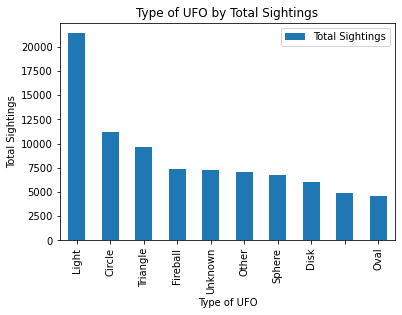

In [47]:
top10reported.plot.bar(x = 'Type of UFO', y = 'Total Sightings')
plt.title('Type of UFO by Total Sightings')
plt.xlabel('Type of UFO')
plt.ylabel('Total Sightings')
plt.savefig('../capstone/data/totalsightingsbytype.png', transparent = True, bbox_inches = 'tight', edgecolor = 'w')
plt.show()

##  Get UFO counts by state for presentation

In [48]:
top20states = df['State'].value_counts().head(20).to_frame().reset_index()

In [49]:
bottom25states = df['State'].value_counts().tail(24).to_frame()

In [50]:
top20states = top20states.rename(columns={'index' : 'State', 'State' : 'Total Sightings'})

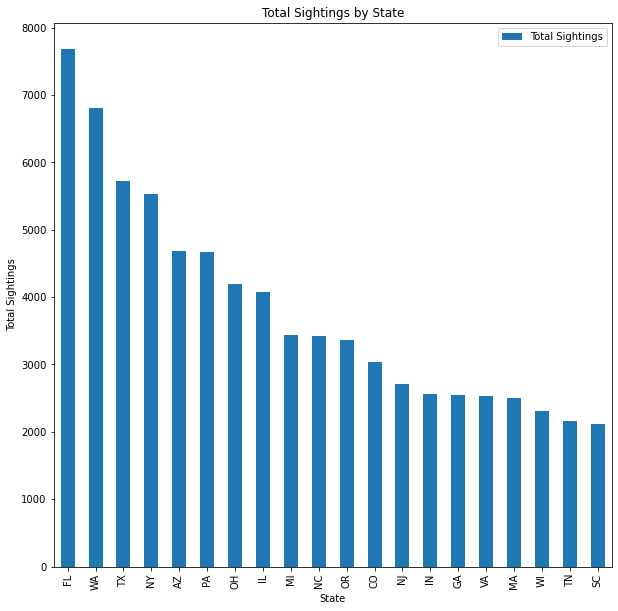

In [51]:
top20states.plot.bar(x = 'State', y = 'Total Sightings', figsize=(10,10))
plt.title('Total Sightings by State')
plt.xlabel('State')
plt.ylabel('Total Sightings')
plt.savefig('../capstone/data/totalsightingsbystate.png', transparent = False, bbox_inches = 'tight', edgecolor = 'w', facecolor='w')
plt.show()

In [52]:
#out of curiosity want top cities in TN
tn=df[df['State'] == 'TN']
tn['City'].value_counts().head()

Nashville       171
Knoxville       140
Memphis         126
Clarksville      77
Murfreesboro     71
Name: City, dtype: int64

##  highest UFO counts by date for presentation

In [53]:
df['Incident Date'].value_counts()

2014-07-04 22:00:00    43
2010-07-04 22:00:00    35
2012-07-04 22:00:00    32
1999-11-16 19:00:00    27
2015-07-04 22:00:00    26
                       ..
2015-07-24 14:00:00     1
2015-08-01 22:10:00     1
2015-08-07 22:35:00     1
2015-08-08 10:00:00     1
2022-08-29 20:04:00     1
Name: Incident Date, Length: 91474, dtype: int64

In [54]:
#fixing datetime

for i,r in df.iterrows():
    if r['Incident Date'].year > 2022:
        df.at[i, 'Incident Date'] = r['Incident Date'].replace(year=r['Incident Date'].year-100)

In [55]:
df['Incident Date'][1251]

Timestamp('1971-08-01 21:00:00')

In [56]:
df

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture,Duration1,dur_multi
0,2022-06-19 01:20:00,Cordova,AL,USA,Light,10 min,Bright object with light ring trailing it,6/22/22,Yes,10,60.0
1,2022-06-14 20:35:00,Guntersville,AL,USA,Light,About 70 minutes,A sphere/ball of light hovering above the water.,6/22/22,Yes,70,60.0
2,2022-06-11 13:42:00,Montgomery,AL,USA,Cylinder,Probably 20-25 mins,In a telescope it looked like a purplish pink ...,6/22/22,Yes,20,60.0
3,2022-06-06 21:30:00,TRUSSVILLE,AL,USA,Light,8-10 seconds,Three lights moving across the sky,6/22/22,,8,1.0
4,2022-06-05 02:00:00,"Cold Bluff, Alabama",AL,USA,Changing,Unbleiveabla,Terrifying,6/22/22,,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
105729,1951-07-03 12:00:00,Green River,WY,USA,Sphere,5 to 7 min,Glowing white spherical large craft (50 to 100...,10/15/02,,5,60.0
105730,1949-06-30 23:00:00,Little America (near),WY,USA,Disk,5 minutes,"One night as a child, I saw a little man in a ...",12/1/19,,5,60.0
105731,1971-06-30 14:00:00,Yellowstone National Park,WY,USA,Egg,not known,Old photos from 1871 show what appears to be o...,12/12/09,,0,0.0
105732,2022-08-29 20:04:00,Wright,WY,USA,Changing,2+ hours,Was standing outside. A huge bright green ligh...,12/21/17,,2,3600.0


In [57]:
top10times = df['Incident Date'].value_counts().head(10).to_frame().reset_index()

In [58]:
top10times = top10times.rename(columns = {'index' : 'Date & Time', 'Incident Date' : 'Total Sightings'})
top10times

,Date & Time,Total Sightings
0,2014-07-04 22:00:00,43
1,2010-07-04 22:00:00,35
2,2012-07-04 22:00:00,32
3,1999-11-16 19:00:00,27
4,2015-07-04 22:00:00,26
5,2009-09-19 20:00:00,26
6,2004-10-31 20:00:00,26
7,2014-07-04 21:00:00,26
8,2011-07-04 22:00:00,25
9,2021-12-04 18:30:00,24


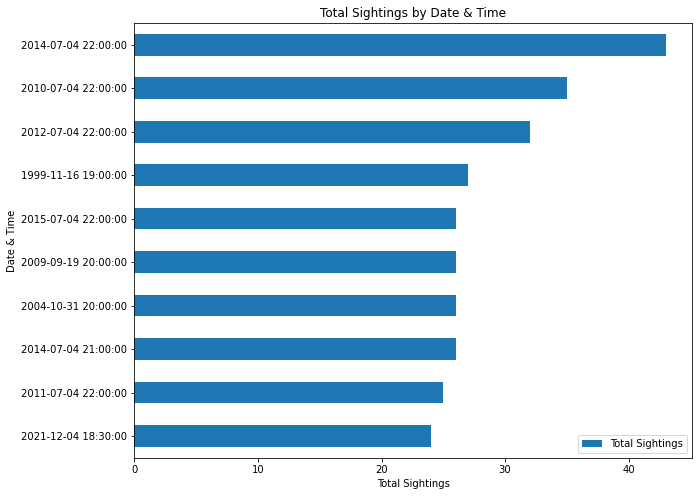

In [59]:
ax =top10times.plot.barh(x = 'Date & Time', y = 'Total Sightings', figsize=(10,8))
plt.title('Total Sightings by Date & Time')
plt.xlabel('Total Sightings')
plt.ylabel('Date & Time')
ax.invert_yaxis()
plt.savefig('../capstone/data/totalsightingsbydatetime.png', transparent = False, bbox_inches = 'tight', edgecolor = 'w', facecolor='w')
plt.show()

## Now to fix duration column!

In [60]:
df

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture,Duration1,dur_multi
0,2022-06-19 01:20:00,Cordova,AL,USA,Light,10 min,Bright object with light ring trailing it,6/22/22,Yes,10,60.0
1,2022-06-14 20:35:00,Guntersville,AL,USA,Light,About 70 minutes,A sphere/ball of light hovering above the water.,6/22/22,Yes,70,60.0
2,2022-06-11 13:42:00,Montgomery,AL,USA,Cylinder,Probably 20-25 mins,In a telescope it looked like a purplish pink ...,6/22/22,Yes,20,60.0
3,2022-06-06 21:30:00,TRUSSVILLE,AL,USA,Light,8-10 seconds,Three lights moving across the sky,6/22/22,,8,1.0
4,2022-06-05 02:00:00,"Cold Bluff, Alabama",AL,USA,Changing,Unbleiveabla,Terrifying,6/22/22,,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
105729,1951-07-03 12:00:00,Green River,WY,USA,Sphere,5 to 7 min,Glowing white spherical large craft (50 to 100...,10/15/02,,5,60.0
105730,1949-06-30 23:00:00,Little America (near),WY,USA,Disk,5 minutes,"One night as a child, I saw a little man in a ...",12/1/19,,5,60.0
105731,1971-06-30 14:00:00,Yellowstone National Park,WY,USA,Egg,not known,Old photos from 1871 show what appears to be o...,12/12/09,,0,0.0
105732,2022-08-29 20:04:00,Wright,WY,USA,Changing,2+ hours,Was standing outside. A huge bright green ligh...,12/21/17,,2,3600.0


In [61]:
df['Duration1'] = df['Duration1'].astype(int)

In [62]:
df

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture,Duration1,dur_multi
0,2022-06-19 01:20:00,Cordova,AL,USA,Light,10 min,Bright object with light ring trailing it,6/22/22,Yes,10,60.0
1,2022-06-14 20:35:00,Guntersville,AL,USA,Light,About 70 minutes,A sphere/ball of light hovering above the water.,6/22/22,Yes,70,60.0
2,2022-06-11 13:42:00,Montgomery,AL,USA,Cylinder,Probably 20-25 mins,In a telescope it looked like a purplish pink ...,6/22/22,Yes,20,60.0
3,2022-06-06 21:30:00,TRUSSVILLE,AL,USA,Light,8-10 seconds,Three lights moving across the sky,6/22/22,,8,1.0
4,2022-06-05 02:00:00,"Cold Bluff, Alabama",AL,USA,Changing,Unbleiveabla,Terrifying,6/22/22,,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
105729,1951-07-03 12:00:00,Green River,WY,USA,Sphere,5 to 7 min,Glowing white spherical large craft (50 to 100...,10/15/02,,5,60.0
105730,1949-06-30 23:00:00,Little America (near),WY,USA,Disk,5 minutes,"One night as a child, I saw a little man in a ...",12/1/19,,5,60.0
105731,1971-06-30 14:00:00,Yellowstone National Park,WY,USA,Egg,not known,Old photos from 1871 show what appears to be o...,12/12/09,,0,0.0
105732,2022-08-29 20:04:00,Wright,WY,USA,Changing,2+ hours,Was standing outside. A huge bright green ligh...,12/21/17,,2,3600.0


In [63]:
for i,r in df.iterrows():
    df.loc[i, 'Duration'] = df.loc[i, 'Duration1']*df.loc[i, 'dur_multi']

In [64]:
df

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture,Duration1,dur_multi
0,2022-06-19 01:20:00,Cordova,AL,USA,Light,600.0,Bright object with light ring trailing it,6/22/22,Yes,10,60.0
1,2022-06-14 20:35:00,Guntersville,AL,USA,Light,4200.0,A sphere/ball of light hovering above the water.,6/22/22,Yes,70,60.0
2,2022-06-11 13:42:00,Montgomery,AL,USA,Cylinder,1200.0,In a telescope it looked like a purplish pink ...,6/22/22,Yes,20,60.0
3,2022-06-06 21:30:00,TRUSSVILLE,AL,USA,Light,8.0,Three lights moving across the sky,6/22/22,,8,1.0
4,2022-06-05 02:00:00,"Cold Bluff, Alabama",AL,USA,Changing,0.0,Terrifying,6/22/22,,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
105729,1951-07-03 12:00:00,Green River,WY,USA,Sphere,300.0,Glowing white spherical large craft (50 to 100...,10/15/02,,5,60.0
105730,1949-06-30 23:00:00,Little America (near),WY,USA,Disk,300.0,"One night as a child, I saw a little man in a ...",12/1/19,,5,60.0
105731,1971-06-30 14:00:00,Yellowstone National Park,WY,USA,Egg,0.0,Old photos from 1871 show what appears to be o...,12/12/09,,0,0.0
105732,2022-08-29 20:04:00,Wright,WY,USA,Changing,7200.0,Was standing outside. A huge bright green ligh...,12/21/17,,2,3600.0


In [65]:
df = df.drop(columns = {'Duration1', 'dur_multi'})

In [66]:
df

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture
0,2022-06-19 01:20:00,Cordova,AL,USA,Light,600.0,Bright object with light ring trailing it,6/22/22,Yes
1,2022-06-14 20:35:00,Guntersville,AL,USA,Light,4200.0,A sphere/ball of light hovering above the water.,6/22/22,Yes
2,2022-06-11 13:42:00,Montgomery,AL,USA,Cylinder,1200.0,In a telescope it looked like a purplish pink ...,6/22/22,Yes
3,2022-06-06 21:30:00,TRUSSVILLE,AL,USA,Light,8.0,Three lights moving across the sky,6/22/22,
4,2022-06-05 02:00:00,"Cold Bluff, Alabama",AL,USA,Changing,0.0,Terrifying,6/22/22,
...,...,...,...,...,...,...,...,...,...
105729,1951-07-03 12:00:00,Green River,WY,USA,Sphere,300.0,Glowing white spherical large craft (50 to 100...,10/15/02,
105730,1949-06-30 23:00:00,Little America (near),WY,USA,Disk,300.0,"One night as a child, I saw a little man in a ...",12/1/19,
105731,1971-06-30 14:00:00,Yellowstone National Park,WY,USA,Egg,0.0,Old photos from 1871 show what appears to be o...,12/12/09,
105732,2022-08-29 20:04:00,Wright,WY,USA,Changing,7200.0,Was standing outside. A huge bright green ligh...,12/21/17,


In [67]:
df['Duration'].mean()/60

12.3105841072881

In [68]:
df[df['Duration'] > 0].Duration.mean()/60

15.216648157024117

##  Hotspots!

In [69]:
top10city = df['City'].value_counts().head(10).to_frame().reset_index()

In [70]:
top10city = top10city.rename(columns={'index' : 'City', 'City': 'Total Sightings'})

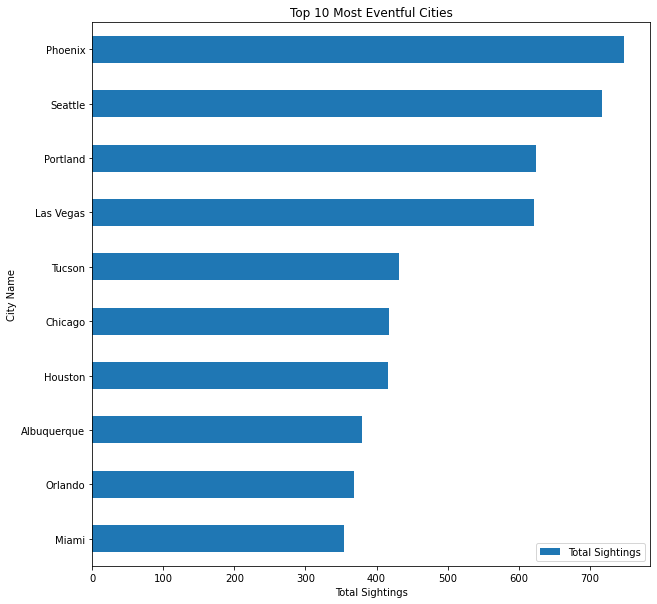

In [71]:
ax = top10city.plot.barh(x = 'City', y = 'Total Sightings', figsize=(10,10))
plt.title('Top 10 Most Eventful Cities')
plt.xlabel('Total Sightings')
plt.ylabel('City Name')
ax.invert_yaxis()
plt.savefig('../capstone/data/totalsightingsbycity.png', transparent = False, bbox_inches = 'tight', edgecolor = 'w', facecolor='w')
plt.show()

##  export and put something together in tableau!

In [72]:
df

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture
0,2022-06-19 01:20:00,Cordova,AL,USA,Light,600.0,Bright object with light ring trailing it,6/22/22,Yes
1,2022-06-14 20:35:00,Guntersville,AL,USA,Light,4200.0,A sphere/ball of light hovering above the water.,6/22/22,Yes
2,2022-06-11 13:42:00,Montgomery,AL,USA,Cylinder,1200.0,In a telescope it looked like a purplish pink ...,6/22/22,Yes
3,2022-06-06 21:30:00,TRUSSVILLE,AL,USA,Light,8.0,Three lights moving across the sky,6/22/22,
4,2022-06-05 02:00:00,"Cold Bluff, Alabama",AL,USA,Changing,0.0,Terrifying,6/22/22,
...,...,...,...,...,...,...,...,...,...
105729,1951-07-03 12:00:00,Green River,WY,USA,Sphere,300.0,Glowing white spherical large craft (50 to 100...,10/15/02,
105730,1949-06-30 23:00:00,Little America (near),WY,USA,Disk,300.0,"One night as a child, I saw a little man in a ...",12/1/19,
105731,1971-06-30 14:00:00,Yellowstone National Park,WY,USA,Egg,0.0,Old photos from 1871 show what appears to be o...,12/12/09,
105732,2022-08-29 20:04:00,Wright,WY,USA,Changing,7200.0,Was standing outside. A huge bright green ligh...,12/21/17,


In [73]:
df.to_csv('../capstone/data/UFOS1.csv')

##  Get seasons and time of day

In [74]:
df['Incident Date'][0].time()

datetime.time(1, 20)

In [75]:
for i, r in df.iterrows():
    if 3 >= r['Incident Date'].month <= 5:
        df.at[i, 'Season'] = 'Spring'
    elif 6 >= r['Incident Date'].month <= 8:
        df.at[i, 'Season'] = 'Summer'
    elif 9 >= r['Incident Date'].month <= 11:
        df.at[i, 'Season'] = 'Fall'
    else:
        df.at[i, 'Season'] = 'Winter'

In [76]:
df['Incident Hour'] = df['Incident Date'].dt.hour

In [77]:
hour = df.groupby('Incident Hour')['Type of UFO'].count().to_frame().reset_index()

In [78]:
hour = hour.rename(columns={'Type of UFO' : 'Total Sightings'})

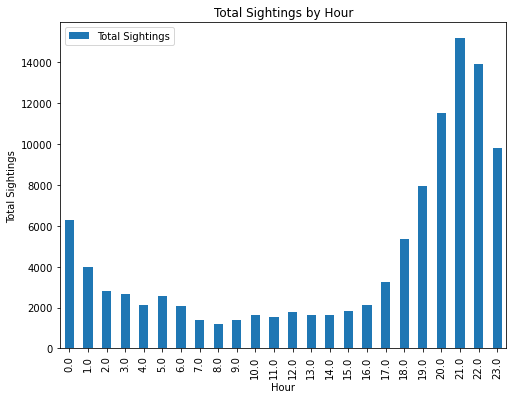

In [79]:
hour.plot.bar(x = 'Incident Hour', y = 'Total Sightings', figsize=(8,6))
plt.title('Total Sightings by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Sightings')
plt.savefig('../capstone/data/totalsightingsbyhour.png', transparent = False, bbox_inches = 'tight', edgecolor = 'w', facecolor='w')
plt.show()

In [80]:
season = df.groupby('Season')['Type of UFO'].count().to_frame().reset_index()

In [81]:
season = season.rename(columns={'Type of UFO' : 'Total Sightings'})

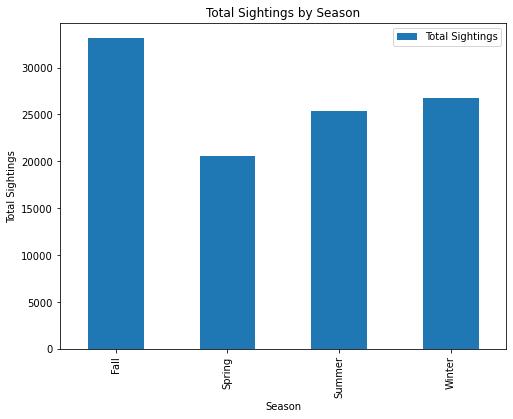

In [82]:
season.plot.bar(x = 'Season', y = 'Total Sightings', figsize=(8,6))
plt.title('Total Sightings by Season')
plt.xlabel('Season')
plt.ylabel('Total Sightings')
plt.savefig('../capstone/data/totalsightingsbyseason.png', transparent = False, bbox_inches = 'tight', edgecolor = 'w', facecolor='w')
plt.show()

In [83]:
df

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture,Season,Incident Hour
0,2022-06-19 01:20:00,Cordova,AL,USA,Light,600.0,Bright object with light ring trailing it,6/22/22,Yes,Summer,1.0
1,2022-06-14 20:35:00,Guntersville,AL,USA,Light,4200.0,A sphere/ball of light hovering above the water.,6/22/22,Yes,Summer,20.0
2,2022-06-11 13:42:00,Montgomery,AL,USA,Cylinder,1200.0,In a telescope it looked like a purplish pink ...,6/22/22,Yes,Summer,13.0
3,2022-06-06 21:30:00,TRUSSVILLE,AL,USA,Light,8.0,Three lights moving across the sky,6/22/22,,Summer,21.0
4,2022-06-05 02:00:00,"Cold Bluff, Alabama",AL,USA,Changing,0.0,Terrifying,6/22/22,,Summer,2.0
...,...,...,...,...,...,...,...,...,...,...,...
105729,1951-07-03 12:00:00,Green River,WY,USA,Sphere,300.0,Glowing white spherical large craft (50 to 100...,10/15/02,,Fall,12.0
105730,1949-06-30 23:00:00,Little America (near),WY,USA,Disk,300.0,"One night as a child, I saw a little man in a ...",12/1/19,,Summer,23.0
105731,1971-06-30 14:00:00,Yellowstone National Park,WY,USA,Egg,0.0,Old photos from 1871 show what appears to be o...,12/12/09,,Summer,14.0
105732,2022-08-29 20:04:00,Wright,WY,USA,Changing,7200.0,Was standing outside. A huge bright green ligh...,12/21/17,,Fall,20.0


In [84]:
df['Incident Year'] = df['Incident Date'].dt.year

In [85]:
durxyear = df.groupby('Incident Year')['Duration'].mean().to_frame().reset_index()

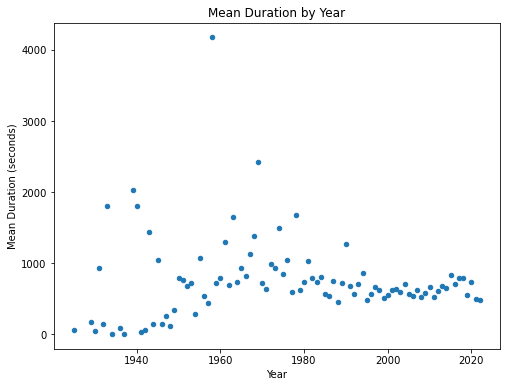

In [86]:
durxyear.plot.scatter(x = 'Incident Year', y = 'Duration', figsize=(8,6))
plt.title('Mean Duration by Year')
plt.xlabel('Year')
plt.ylabel('Mean Duration (seconds)')
plt.savefig('../capstone/data/meandurationbyyear.png', transparent = False, bbox_inches = 'tight', edgecolor = 'w', facecolor='w')
plt.show()

In [87]:
df.to_csv('../capstone/data/UFOS2.csv')

In [88]:
countxyear = df.groupby('Incident Year')['Type of UFO'].count().to_frame().reset_index()
countxyear

,Incident Year,Type of UFO
0,1925.0,1
1,1929.0,2
2,1930.0,3
3,1931.0,2
4,1932.0,2
...,...,...
88,2018.0,2889
89,2019.0,5289
90,2020.0,5991
91,2021.0,2773


In [89]:
countxyear = countxyear.rename(columns = {'Type of UFO' : 'Total Sightings'})

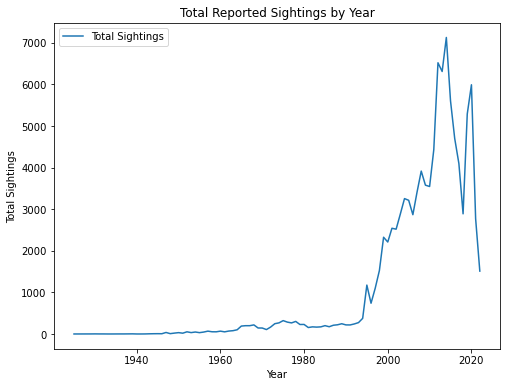

In [90]:
countxyear.plot(x = 'Incident Year', y = 'Total Sightings', figsize=(8,6))
plt.title('Total Reported Sightings by Year')
plt.xlabel('Year')
plt.ylabel('Total Sightings')
plt.savefig('../capstone/data/countbyyear.png', transparent = False, bbox_inches = 'tight', edgecolor = 'w', facecolor='w')
plt.show()

In [91]:
df[df['Incident Date'] == '2021-12-04 18:30:00']

,Incident Date,City,State,Country,Type of UFO,Duration,Description,Posted,Picture,Season,Incident Hour,Incident Year
10872,2021-12-04 18:30:00,Norwalk,CT,USA,Unknown,0.0,Long aircraft,12/19/21,,Winter,18.0,2021.0
10873,2021-12-04 18:30:00,Woodbury,CT,USA,Cigar,0.0,It was hovering over our family farm slowly ho...,12/19/21,,Winter,18.0,2021.0
10874,2021-12-04 18:30:00,Woodbury,CT,USA,Cigar,0.0,A long series of evenly spaced lights (about 1...,12/19/21,,Winter,18.0,2021.0
12746,2021-12-04 18:30:00,Laurel,DE,USA,Unknown,0.0,Looking West 75 41 23 44 An extremely long per...,12/19/21,,Winter,18.0,2021.0
36991,2021-12-04 18:30:00,Wiscasset,ME,USA,Other,0.0,"A distinct, straight ""line of bright white lig...",12/19/21,,Winter,18.0,2021.0
38124,2021-12-04 18:30:00,Greensboro,MD,USA,Cigar,0.0,Long trail of lights with the one in the back ...,12/19/21,,Winter,18.0,2021.0
39838,2021-12-04 18:30:00,Worcester (18 miles SE of),MA,USA,Cigar,0.0,Trail of lights in the sky,12/19/21,,Winter,18.0,2021.0
52830,2021-12-04 18:30:00,North Arlington,NJ,USA,Circle,0.0,A long line of bright circles in the sky trave...,12/19/21,,Winter,18.0,2021.0
52831,2021-12-04 18:30:00,West Orange,NJ,USA,,0.0,"I was walking my dog and saw a long, tubular c...",12/19/21,,Winter,18.0,2021.0
52832,2021-12-04 18:30:00,Berkeley Heights,NJ,USA,Light,0.0,Long string of lights - hull shape,12/19/21,,Winter,18.0,2021.0


In [92]:
tntop = tn['City'].value_counts().head().to_frame().reset_index()

In [93]:
tntop = tntop.rename(columns= {'index' : 'City' ,  'City' : 'Total Sightings'})

In [94]:
tntop

,City,Total Sightings
0,Nashville,171
1,Knoxville,140
2,Memphis,126
3,Clarksville,77
4,Murfreesboro,71


##  Ahhhhhh! explore tag issue!


In [95]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC','FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME',
         'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI',
         'SC', 'SD', 'TN', 'TX', 'UT','VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [108]:
eventlist1 = []
eventlistscrubbed1 = []

for state in states:
    URL = 'https://nuforc.org/webreports/ndxl'+state+'.html'
    response = requests.get(URL)
    soup = bs(response.text)
    events1 = soup.find_all('saucer')
    #events1.decompose()
    events = soup.find_all('tr', attrs = {'valign' : 'TOP'})

    for event in events:
        eventlist1.append([entry.text for entry in event.find_all('td', recursive = False)])
    
    eventlistscrubbed1.extend(eventlist1)

In [109]:
what = [entry for entry in eventlistscrubbed1 if len(entry) != 9]

In [110]:
what[72]

['11/23/06 18:50',
 'Blue Springs',
 'MO',
 'USA',
 'Light',
 'Two lighted objects of varying intensity intersect  @ same location in space within 20 seconds of each other.12/7/06\n11/23/06 17:50MaconMOUSATriangle2 minutestriangular, winged, no lights, no sound, grayish, gliding12/7/06\n11/18/06 19:50SpringfieldMOUSAChevron30 secondsLuminescent, boomerang shaped object moving silently south.12/7/06\n11/17/06 19:00NevadaMOUSALightAbout 30 secondsStrange stationary light. Increased in brightness, became faint, moved to the right, and vanished.  ((NUFORC Note:  Iridium flare.  PD12/7/06\n11/15/06 23:00Kansas CityMOUSATriangle30 secondsCan the Silent approach of UFOS be heard????8/12/08\n11/4/06 12:15St. CharlesMOUSAFormation2 minutesTwo Orb- Like UFOs seen near Muggee Road in St. Charles, MO12/7/06\n10/28/06 18:15MarshfieldMOUSALight25 minutesBright lights, jets, mystery.10/30/06\n10/28/06 00:20LibertyMOUSALight4secOrange lights (7) over Liberty, MO flying in V shape10/30/06\n10/6/06 02:0

##  tags i need to exclude are: 'saucer' and 'min >'*
